# Visualising multivariate distributions

## 1. Plotting joint distributions (1):
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a _bivariate distribution_.

Seaborn's `sns.jointplot()` provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of `sns.lmplot()`. By default, calling `sns.jointplot(x, y, data)` renders a few things:

A scatter plot using the specified columns `x` and `y` from the DataFrame `data`.
A (univariate) histogram along the top of the scatter plot showing distribution of the column `x`.
A (univariate) histogram along the right of the scatter plot showing distribution of the column `y`.

### Instructions:
* Use `sns.jointplot()` to visualize the joint variation of the columns `'hp'` (on the x-axis) and `'mpg'` (on the y-axis) from the DataFrame `auto`.

In [1]:
# Import pandas
import pandas as pd
# Import plotting modules
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Switch to seaborn style
plt.style.use('seaborn')

# Import file with pandas
path = '12_Introduction_to_Data_Visualisation//_datasets//'
auto = pd.read_csv(path+'auto-mpg.csv', delimiter=',')
auto = auto[['mpg', 'hp', 'origin']]

C:\Python37\Mikele\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


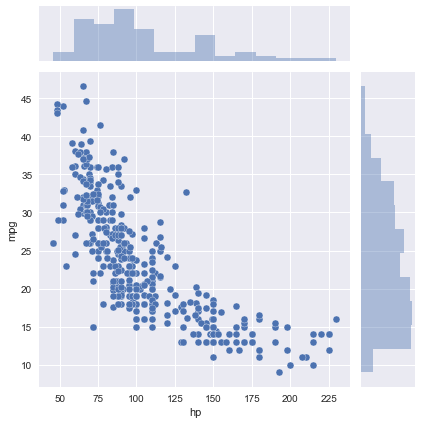

In [2]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto, edgecolor='w')

# Display the plot
plt.show()

In the next exercise, you'll extend this plot by specifying the 'kind' parameter.

## 2. Plotting joint distributions (2):
The seaborn function `sns.jointplot()` has a parameter `kind` to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

* `kind='scatter'` uses a scatter plot of the data points
* `kind='reg'` uses a regression plot (default order 1)
* `kind='resid'` uses a residual plot
* `kind='kde'` uses a _kernel density estimate_ of the joint distribution
* `kind='hex'` uses a hexbin plot of the joint distribution

For this exercise, you will again use `sns.jointplot()` to display the joint distribution of the `hp` and `mpg` columns of the `auto` DataFrame. This time, you will use `kind='hex'` to generate a hexbin plot of the joint distribution.

### Instructions:
* Create a hexbin plot of the joint distribution between `'hp'` and `'mpg'`.

C:\Python37\Mikele\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


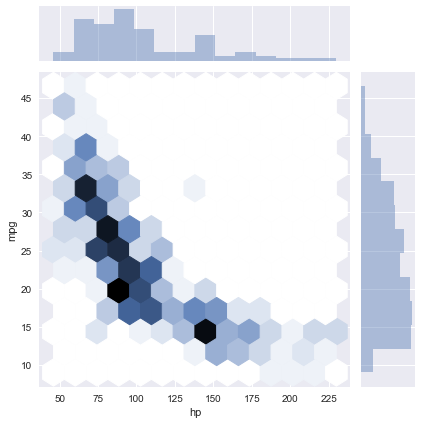

In [3]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', kind='hex', data=auto)

# Display the plot
plt.show()

## 3. Plotting distributions pairwise (1):
Data sets often contain more than two continuous variables. The function `sns.jointplot()` is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function `sns.pairplot()` constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: `sns.pairplot(df)`, where `df` is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

In this exercise, you will use a DataFrame `auto` comprising only three columns from the original auto-mpg data set.

Instructions:
* Print the first five rows of the DataFrame `auto`. This is done for you.
* Plot the joint distributions between columns from the entire DataFrame `auto`.

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


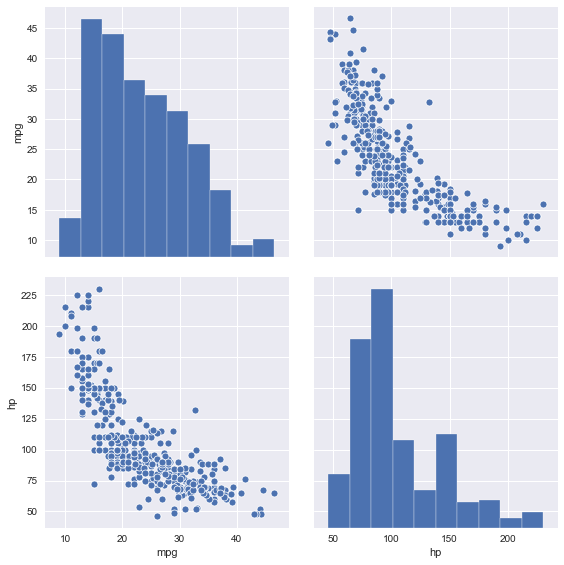

In [4]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto, height=4, diag_kws={'edgecolor':'w'})

# Display the plot
plt.show()

## 4. Plotting distributions pairwise (2):
In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

* You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument `kind='reg'` (where `'reg'` means `'regression'`). Another option for `kind` is `'scatter'` (the default) that plots scatter plots in the off-diagonal subplots.
* You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument `hue` specifying the `'origin'`.

### Instructions:
* Plot the pairwise joint distributions separated by continent of origin and display the regressions.

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


C:\Python37\Mikele\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


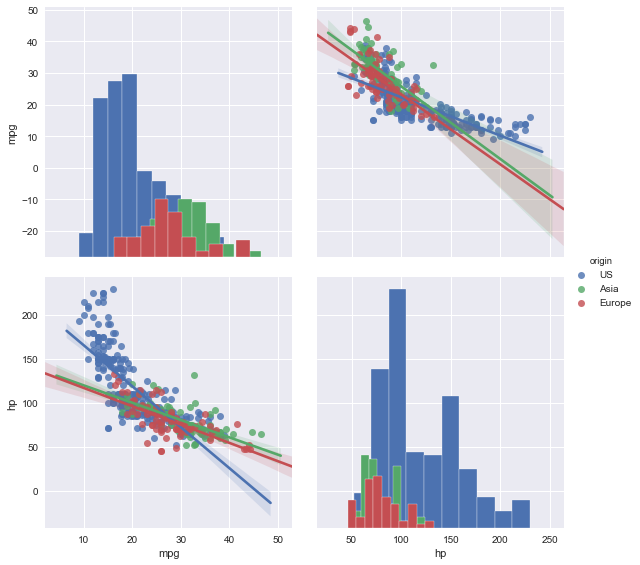

In [6]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
# sns.pairplot(auto, diag_kind='hist', kind='reg', hue="origin", 
#               height=4, diag_kws={'edgecolor':'w'})
sns.pairplot(auto, hue='origin', diag_kind='hist', kind='reg', height=4,
             diag_kws={'edgecolor':'w'})

# Display the plot
plt.show()

## 5. Visualising correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a _heatmap_. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

### Instructions:
* Print the covariance matrix `cov_matrix` to examine its contents and labels. This has been done for you.
* Plot the covariance matrix `cov_matrix` using `sns.heatmap()`.

In [7]:
# Reload file with pandas
auto = pd.read_csv(path+'auto-mpg.csv', delimiter=',')

# Compute the continuous valued columns: quant_cols
quant_cols = ['mpg', 'hp', 'weight', 'accel', 'displ']
# Normalize the dataframe: df_normalized
df_normalized = (auto[quant_cols]  - auto[quant_cols].mean()) / auto[quant_cols].std()
# Get the covariance matrix of normalized dataframe: cov_matrix
cov_matrix = df_normalized.cov()



             mpg        hp    weight     accel     displ
mpg     1.000000 -0.778427 -0.832244  0.423329 -0.805127
hp     -0.778427  1.000000  0.864538 -0.689196  0.897257
weight -0.832244  0.864538  1.000000 -0.416839  0.932994
accel   0.423329 -0.689196 -0.416839  1.000000 -0.543800
displ  -0.805127  0.897257  0.932994 -0.543800  1.000000


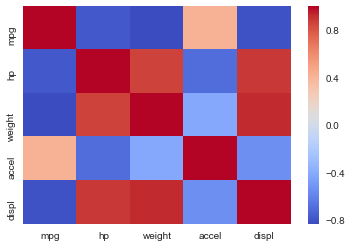

In [10]:
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix, cmap="coolwarm")

# Display the heatmap
plt.show()

If pair plot starts to become visually overwhelming, heat maps are a great alternative.